# K-space

MRI is a so-called Fourier imaging technique, where data is acquired in the Fourier Transform domain.  The Fourier Transform domain is referred to as "k-space".  This section describes the how to characterize MRI spatial encoding using k-space and introduces the concept of k-space trajectories for sampling data.

## Learning Goals

1. Describe how images are formed
    * Understand why MRI is a Fourier imaging method
    * Describe how MRI data is accumulated and sorted
    * Describe what a k-space trajectory is

## Generalized Spatial Encoding

In general, the application of magnetic field gradients will change the phase of the transverse magnetization with dependence on the gradient waveforms used and position:

$$M_{XY}(\vec{r}, t) = M_{XY}(\vec{r}, 0) \exp\left( -i \gamma \int_0^t \vec{G}(\tau) \cdot \vec{r} \ d\tau \right)$$ 

Using the notation $m(\vec{r}) = M_{XY}(\vec{r}, t=0)$, this can be written as

$$M_{XY}(\vec{r}, t) = m(\vec{r}) \exp\left( -i \gamma \int_0^t \vec{G}(\tau) \cdot \vec{r} \ d\tau \right)$$

A key fact here is that the phase accumulation depends on the cumulative gradient area, or the integral of the gradient.  This means we can turn the gradients on and off to start and stop the phase accumulation, and also reverse the gradient polarity to undo any prior phase accumulation.

### Definition of k-space

Here, we introduce the concept of k-space, which is a simplified representation of the phase accumulation due to magnetic field gradients.  It is defined as

$$\vec{k}(t) = [k_X(t), k_Y(t), k_Z(t)]^T = \frac{\gamma}{2\pi} \int_0^t \vec{G}(\tau) \cdot \vec{r} \ d\tau$$ 

The effect of gradients on the transverse magnetization then becomes

$$M_{XY}(\vec{r}, t) =  m(\vec{r}) e^{ -i 2 \pi \vec{k}(t) \cdot \vec{r} }$$ 

The specific motivation for k-space will become apparent soon, when we formulate the signal equation and see that there is a Fourier Transform.

### MRI signal in the Fourier domain

The MRI signal comes from the precession of the transverse magnetization, and thus is proportional to the transverse magnetization.  The MRI signal also comes from any precessing magnetization within the sensitive volume of the RF receive coils.  In other words, it is also not localized to a single location, but rather is summed over a volume:

$$\begin{align}
s(t) & = \int M_{XY}(\vec{r},t) \ d\vec{r} \\
 & =  \int m(\vec{r}) \exp(-i2\pi \vec{k}(t) \cdot \vec{r}) \ d\vec{r}
 \end{align}$$ 

The amazing result here is that this describes our MRI signal in the form of a Fourier Transform:

$$\mathcal{F} \{ f(\vec{r}) \} = F(\vec{k}) = \int_{-\infty}^\infty f(\vec{r}) \exp(-i 2 \pi \vec{k} \cdot  \vec{r}) \ d\vec{r}$$

This is the power of the k-space representation, that it describes how MRI is sampling data in the Fourier Transform domain, or the spatial frequency domain, of the object net magnetization.  In other words, MRI signals are a measure of the spatial frequencies of our object.  

This result means that, to reconstruct an image we need to put our MRI signals into their k-space location based on the applied gradients, and then use an inverse Fourier Transform.
Our signal is the Fourier Transform of the initial transverse magnetization, evaluated at a spatial frequnecy, $\vec{k}$, that is determined by the k-space trajectory, $\vec{k}(t)$:

$$ s(t) = \mathcal{F} \{ M_{XY}(\vec{r},0) \} |_{\vec{k} = \vec{k}(t)} $$


Defining

$$\mathcal{F}\{ m(\vec{r}) \} = M(\vec{k})$$

then we get

$$ s(t) = M(\vec{k}(t)) $$

This key result says that the received signal is proportional to the Fourier Transform of the transverse magnetization, evaluated at the k-space location determined by the k-space trajectory.

## From MRI data to images

The flow of the experiment and data is as follows:

1. RF excitation to create transverse magnetization, $M_{XY}(\vec{r},0)$
1. Gradients applied as $\vec{G}(t)$ and data is acquired
1. k-space locations, $\vec{k}(t)$, are determined based on the applied gradients
1. MR signal acquired represents the Fourier Transform of the transverse magnetization at the k-space location: $ s(t) = M(\vec{k}(t))$
1. MR signal over time is stored in a data matrix with known k-space locations to create $M(\vec{k})$
1. Inverse Fourier Transform is applied to reconstruct an image of the transverse magnetization $\mathcal{F}^{-1}\{ M(\vec{k} )\} = m(\vec{r})$

We have now have the incredible result that we used magnetic field gradients, the k-space framework, and appropriate acquisition and ordering of the MR signal to create an **IMAGE**!!

## K-space Trajectories

K-space is a very general method for capturing the effect of spatial encoding gradients, and the "k-space trajectory" is defined as the pattern created over time by the gradients:

$$\vec{k}(t) = \frac{\gamma}{2\pi} \int_0^t \vec{G}(\tau) d\tau$$

Note that k-space trajectories always start at the center of k-space, $\vec{k}(0) = 0$ and are only defined once there is transverse magnetization (e.g. after an RF pulse).

The following simulation of the net magnetizations shows how rotations and k-space trajectory during a typical Cartesian (or 2D FT) gradient pulse sequence, which is differs from the simulation above in that an initial dephasing gradient in the frequency encoding direction is applied to sample both positive and negative spatial frequencies in k-space:

![frequency_phase_encoding-full-Mxy.gif](images/frequency_phase_encoding-full-Mxy.gif)

![frequency_phase_encoding-full-image_phase.gif](images/frequency_phase_encoding-full-image_phase.gif)

(See ``spatial_encoding_Mxy_illustration.m`` for code generating this movie)

### K-space trajectories

The k-space pattern during a MRI experiment is referred to as the k-space "trajectory".  The most common are Cartesian trajectories, in which parallel lines of k-space are covered to sample a 2D (or 3D) grid.  K-space trajectories with other patterns, such as radial lines, spirals, rastered lines (echo-planar trajectories), or blades can also be used. 

The gradient for a given k-space trajectory is determined by the derivative of the trajectory.

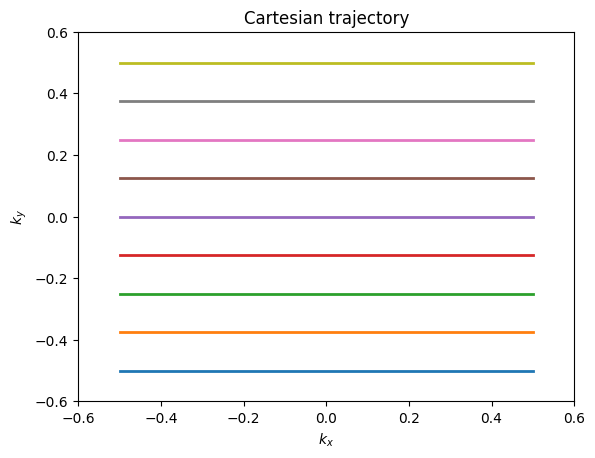

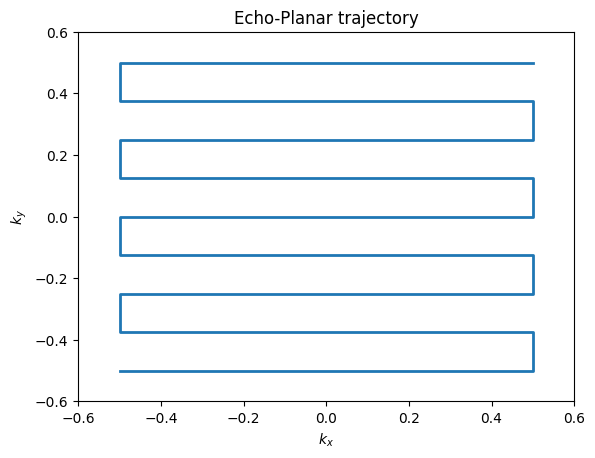

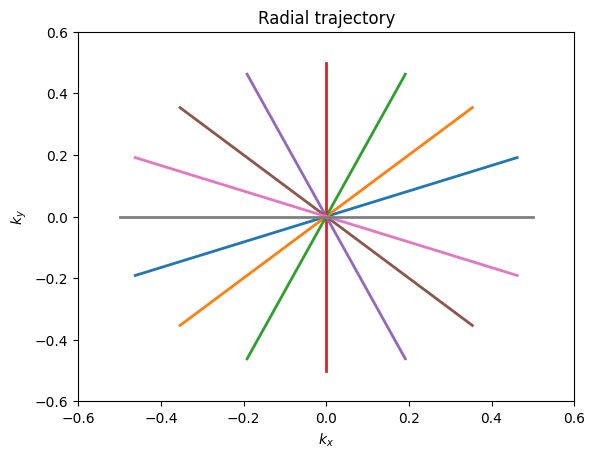

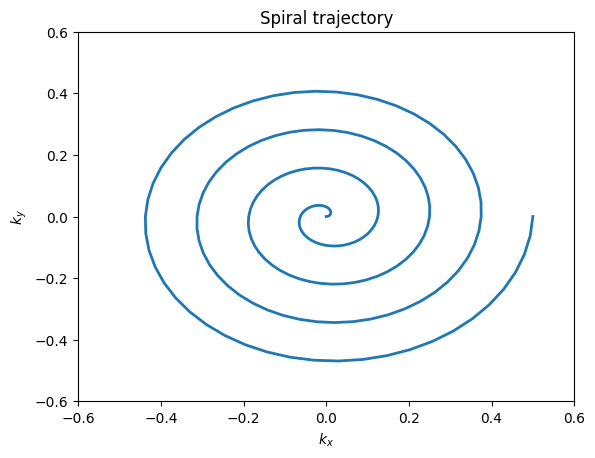

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cartesian
N = 8
k = np.linspace(-N/2, N/2, N+1) / N
ky, kx = np.meshgrid(k, k)

plt.figure()
plt.plot(kx, ky, linewidth=2)
plt.xlim([-.6, .6])
plt.ylim([-.6, .6])
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.title('Cartesian trajectory')

# Echo-Planar
kx_ep = ky.copy()
kx_ep[1::2,:] = kx_ep[1::2,::-1] # Reverse every other row
ky_ep = kx.copy()
kx_ep = kx_ep.flatten()
ky_ep = ky_ep.flatten()

plt.figure()
plt.plot(kx_ep, ky_ep, linewidth=2)
plt.xlim([-.6, .6])
plt.ylim([-.6, .6])
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.title('Echo-Planar trajectory')

# Radial
theta = 2 * np.pi * np.arange(1, N+1) / (2*N)
k_theta = np.exp(1j * theta)
k_radial = np.outer(k, k_theta)

plt.figure()
for i in range(N):
    plt.plot(np.real(k_radial[:, i]), np.imag(k_radial[:, i]), linewidth=2)
plt.xlim([-.6, .6])
plt.ylim([-.6, .6])
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.title('Radial trajectory')

# Spiral
n = np.linspace(0, 1, 201)
Nturns = N / 2
k_spiral = 0.5 * n * np.exp(1j * 2 * np.pi * Nturns * n)

plt.figure()
plt.plot(np.real(k_spiral), np.imag(k_spiral), linewidth=2)
plt.xlim([-.6, .6])
plt.ylim([-.6, .6])
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.title('Spiral trajectory')

plt.show()


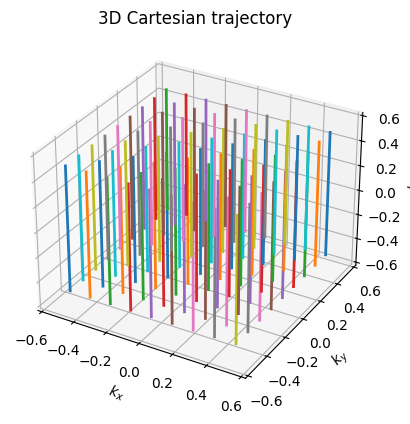

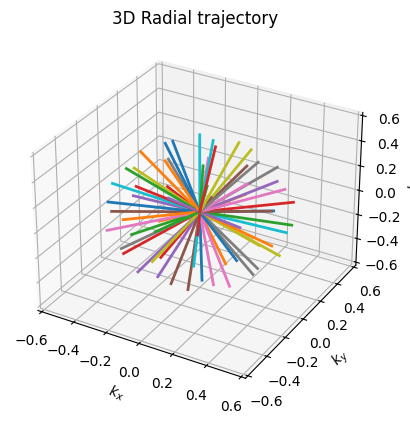

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N=8

# Cartesian
k = np.linspace(-N/2, N/2, N+1) / N
kx, ky, kz = np.meshgrid(k, k, k)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(kx, ky, kz)
# Plot all points in the 3D Cartesian k-space grid
for i in range(kx.shape[0]):
    for j in range(kx.shape[1]):
        ax.plot(kx[i,j,:], ky[i,j,:], kz[i,j,:], linewidth=2)
ax.set_xlim([-.6, .6])
ax.set_ylim([-.6, .6])
ax.set_zlim([-.6, .6])
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('$k_z$')
ax.set_title('3D Cartesian trajectory')

# Radial
N_radial = N**2 
n = np.arange(1, N_radial+1)
kz_r = (2*n - N_radial - 1) / N_radial
phi = np.sqrt(N_radial * np.pi) * np.arcsin(kz_r)
kx_r = np.cos(phi) * np.sqrt(1 - kz_r**2)
ky_r = np.sin(phi) * np.sqrt(1 - kz_r**2)

kx_r = kx_r/2
ky_r = ky_r/2
kz_r = kz_r/2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(N_radial):
    # Plot radial lines from the origin to each point
    ax.plot([0, kx_r[i]], [0, ky_r[i]], [0, kz_r[i]], linewidth=2)
ax.set_xlim([-.6, .6])
ax.set_ylim([-.6, .6])
ax.set_zlim([-.6, .6])
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('$k_z$')
ax.set_title('3D Radial trajectory')

plt.show()

These movies illustrate the phase accumulation during non-Cartesian trajectories

![radial_encoding-full-Mxy.gif](images/radial_encoding-full-Mxy.gif)

![spiral_encoding-full-Mxy.gif](images/spiral_encoding-full-Mxy.gif)

(See ``spatial_encoding_Mxy_illustration.m`` for code generating this movie)